## Import Essential Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Install Kaggle

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezabinayiaan","key":"e4252e5c64d017ba2aedfc49cd806616"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

### Download Dataset

In [6]:
!kaggle datasets download dileep070/heart-disease-prediction-using-logistic-regression

  0% 0.00/58.4k [00:00<?, ?B/s]
100% 58.4k/58.4k [00:00<00:00, 26.3MB/s]


In [7]:
!ls

heart-disease-prediction-using-logistic-regression.zip	sample_data
kaggle.json


In [8]:
!unzip heart-disease-prediction-using-logistic-regression.zip

Archive:  heart-disease-prediction-using-logistic-regression.zip
  inflating: framingham.csv          


## Display Data

In [9]:
df = pd.read_csv('framingham.csv')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [10]:
df.shape

(4238, 16)

## Drop Nan Value

In [11]:
df = df.dropna()
df.shape

(3656, 16)

## Separate Target & Features

In [12]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [13]:
print(x.shape)
print(y.shape)

(3656, 15)
(3656,)


## Define some Functions that We should use in our algorithm

### Z Score Normalization

In [14]:
def z_score(x):
  mu = np.mean(x, axis=0)
  sigma = np.std(x, axis=0)
  return (x - mu) / sigma

In [15]:
X = z_score(x)
X.shape

(3656, 15)

In [16]:
X

array([[ 1.11982472, -1.23335117,  1.97575158, ...,  0.29168785,
         0.35633992, -0.20312694],
       [-0.8929969 , -0.41559058,  0.01979497, ...,  0.7246142 ,
         1.60828949, -0.24495595],
       [ 1.11982472, -0.1819447 , -0.95818334, ..., -0.10926099,
        -0.06097661, -0.49592996],
       ...,
       [ 1.11982472,  0.05170118, -0.95818334, ...,  0.04570696,
        -0.81214636,  0.17333408],
       [ 1.11982472,  0.16852412,  0.99777327, ..., -1.49413337,
        -0.89560966, -0.57958797],
       [-0.8929969 ,  0.28534706,  0.01979497, ..., -1.06120701,
         0.35633992,  1.05174313]])

### Sigmoid Function

In [17]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

### Initial Our Coefficient

In [18]:
w = np.zeros(X.shape[1])
b = 0.

In [19]:
w.shape

(15,)

### Cost Function For Logistic Regression

In [20]:
def cost_function(x, y, w, b):
  m = x.shape[0]
  z = np.dot(x, w) + b
  f = sigmoid(z)
  loss = (np.dot(np.log(f), -y) - np.dot(np.log(1 - f), (1 - y))) / m
  return loss

In [21]:
loss = cost_function(X, y, w, b)
print('Cost at initial w and b (zeros): {:.3f}'.format(loss))

Cost at initial w and b (zeros): 0.693


### Gradient Descent 

In [22]:
def gradient_descent(x, y, w, b):
  m = x.shape[0]
  z = np.dot(x, w) + b
  f = sigmoid(z)
  dj_dw = np.dot((f - y), x) / m
  dj_db = np.sum(f - y) / m
  return dj_dw, dj_db

In [23]:
dj_dw, dj_db = gradient_descent(X, y, w, b)
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )
print(f'dj_db at initial w and b (zeros):{dj_db}' )

dj_db at initial w and b (zeros):[-0.0329696290030919, -0.08402260019949039, 0.022664147065022233, -0.006891196994501788, -0.01874386665080358, -0.0320248009412741, -0.017375360507874756, -0.06524447877940263, -0.033563486299067614, -0.03274749610343928, -0.08009653092040062, -0.05402711033091954, -0.029442957026933385, -0.007375339368701411, -0.04382134104552093]
dj_dw at initial w and b (zeros):0.3476477024070022


### Run Model

In [24]:
epochs = 10000
alpha = 0.003
loss_history = []
for i in range(epochs):
  dj_dw, dj_db = gradient_descent(X, y, w, b)
  w = w - (alpha * dj_dw)
  b = b - (alpha * dj_db)
  loss = cost_function(X, y, w, b)
  loss_history.append(loss)
  if i % 1000 == 0:
    print(loss)

0.6926977737018667
0.4764719426676651
0.41886134288337845
0.39761717542735586
0.38818125403803694
0.38343757961472774
0.3808407081531355
0.3793306749686793
0.37841319196617657
0.37783706630255287


### Plot Loss History

<function matplotlib.pyplot.show(*args, **kw)>

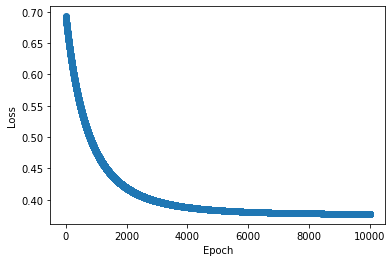

In [25]:
plt.scatter(np.arange(epochs), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show

### Predict 

In [26]:
def predict(x, w, b):
  z = np.dot(x,w) + b
  f = sigmoid(z)
  p = f >= 0.5
  return p

### Train Accuracy

In [27]:
p = predict(X, w,b)
print('Train Accuracy: %f'%(np.mean(p == y) * 100))

Train Accuracy: 85.475930


## Regularization

In [28]:
def reg_cost_function(x, y, w, b, lambda_):
  m, n = x.shape
  loss_without_reg = cost_function(x, y, w, b)
  reg_cost = np.sum(w ** 2)
  total_loss = loss_without_reg + ((lambda_ / (2 * m)) * reg_cost)
  return total_loss

In [29]:
lambda_ = 0.5
cost = reg_cost_function(X, y, w, b, lambda_)
print("Regularized cost :", cost)

Regularized cost : 0.37749660311694117


In [30]:
def reg_gradient_descent(x, y, w, b, lambda_):
  m = x.shape[0]
  dj_dw, dj_db = gradient_descent(x, y, w, b)
  dj_dw += (lambda_ / m) * w
  return dj_dw, dj_db

In [31]:
epochs = 10000
alpha = 0.01
lambda_ = 0.5
loss_history = []
for i in range(epochs):
  dj_dw, dj_db = reg_gradient_descent(X, y, w, b, lambda_)
  w = w - (alpha * dj_dw)
  b = b - (alpha * dj_db)
  loss = reg_cost_function(X, y, w, b, lambda_)
  loss_history.append(loss)
  if i % 1000 == 0:
    print(loss)

0.377495620689604
0.376955463551913
0.37680019357700695
0.3767484616693123
0.37672842170570625
0.37671942097868466
0.3767148568974836
0.3767123441420131
0.37671089227873583
0.3767100312885805


<function matplotlib.pyplot.show(*args, **kw)>

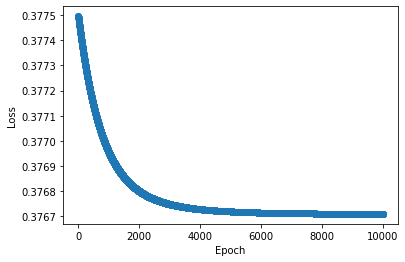

In [32]:
plt.scatter(np.arange(epochs), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show

In [33]:
p = predict(X, w,b)
print('Train Accuracy: %f'%(np.mean(p == y) * 100))

Train Accuracy: 85.640044
